# Customer Segmentation

## UPLOAD DATA DAN DATA WRANGLING

In [23]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [24]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/content/drive/MyDrive/mikti/marketing_campaign.csv', sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [26]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [27]:
# mengecek data yang kosong
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [28]:
# Mengwcwk Duplikat data
data.duplicated().sum()

0

## Data Cleansing dan Preprocessing

In [29]:
# Menghapus data yang kosong
data = data.dropna()

print("Total data yang kosong dan dihapus yaitu : ",len(data))

Total data yang kosong dan dihapus yaitu :  2216


In [30]:
# Mengubah tipe data dt customer dari objeck ke date time format
data.loc[:,'Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
dates =[]
for i in data['Dt_Customer']:
  dates.append(i)

print ("The MAX newest customer: ", max(dates))
print ("The MIN newest customer: ", min(dates))
data['Dt_Customer'].describe()

The MAX newest customer:  2014-06-29 00:00:00
The MIN newest customer:  2012-07-30 00:00:00


<ipython-input-30-ffc896314727>:9: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  data['Dt_Customer'].describe()


,Dt_Customer
count,2216
unique,662
top,2012-08-31 00:00:00
freq,12


In [31]:
# mengambil tanggal saja
date =[]
for i in data['Dt_Customer']:
  date.append(i.date())

#mengubah list menjadi dataframe
date = pd.DataFrame(date)
date.columns = ['tanggal_customer']
date.head(20)

,tanggal_customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19
5,2013-09-09
6,2012-11-13
7,2013-05-08
8,2013-06-06
9,2014-03-13


Membuat Kolom baru yaitu Customer_for yang merupakan kolom yang menunjukkan berapa lama customer mendaftar

In [32]:
data= data.copy()

d1 = max(data['Dt_Customer'])
days = [(d1 - i).days for i in data['Dt_Customer']]
data['Customer_for']= days
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04 00:00:00,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08 00:00:00,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21 00:00:00,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10 00:00:00,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19 00:00:00,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13 00:00:00,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,381
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10 00:00:00,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,19
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25 00:00:00,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,155
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24 00:00:00,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,156


In [33]:
# Menampilkan frekuensi dari kolom martial status dan kolom edukasi
print("Total frekuensi setiap kategori yang ada di kolom Marital_Status: \n", data['Marital_Status'].value_counts(), "\n")
print("Total frekuensi setiap kategori yang ada di kolom Edukasi: \n", data['Education'].value_counts(), "\n")

Total frekuensi setiap kategori yang ada di kolom Marital_Status: 
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total frekuensi setiap kategori yang ada di kolom Edukasi: 
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 



### Menambah beberapa kolom baru, dan menghapus kolom yang tidak digunakan serta mengganti nama kolomnya

In [34]:
data = data.copy()

# Calculate the age of customer today
data.loc[:, "Age"] = 2021 - data['Year_Birth']

# Calculate total spendings on various items
data.loc[:, "Spent"] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Deriving living situation by marital status
data.loc[:, 'Living_With'] = data['Marital_Status'].replace({
    "Married": "Partner", "Together": "Partner", "Absurd": "Alone",
    "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"
})

# Feature indicating total children living in the household
data.loc[:, 'Children'] = data['Kidhome'] + data['Teenhome']

# Feature for total members in the household
data.loc[:, 'Family_Size'] = data['Living_With'].replace({"Alone": 1, "Partner": 2}) + data['Children']

# Feature pertaining to parenthood
data.loc[:, 'Is_Parent'] = np.where(data['Children'] > 0, 1, 0)

# Segmenting education levels in three groups
data.loc[:, 'Education'] = data['Education'].replace({
    "Basic": "Undergraduate", "2n Cycle": "Undergraduate",
    "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"
})

# Renaming columns for clarity
data.rename(columns={
    "MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"
}, inplace=True)

# Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data.drop(to_drop, axis=1, inplace=True)

data

<ipython-input-34-896e9ef91ee1>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[:, 'Family_Size'] = data['Living_With'].replace({"Alone": 1, "Partner": 2}) + data['Children']


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,40,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,381,54,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,19,75,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,155,40,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,156,65,843,Partner,1,3,1


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
Wines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
Fruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
Meat,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
Fish,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
Sweets,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
Gold,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


Visualisasi Korelasi

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

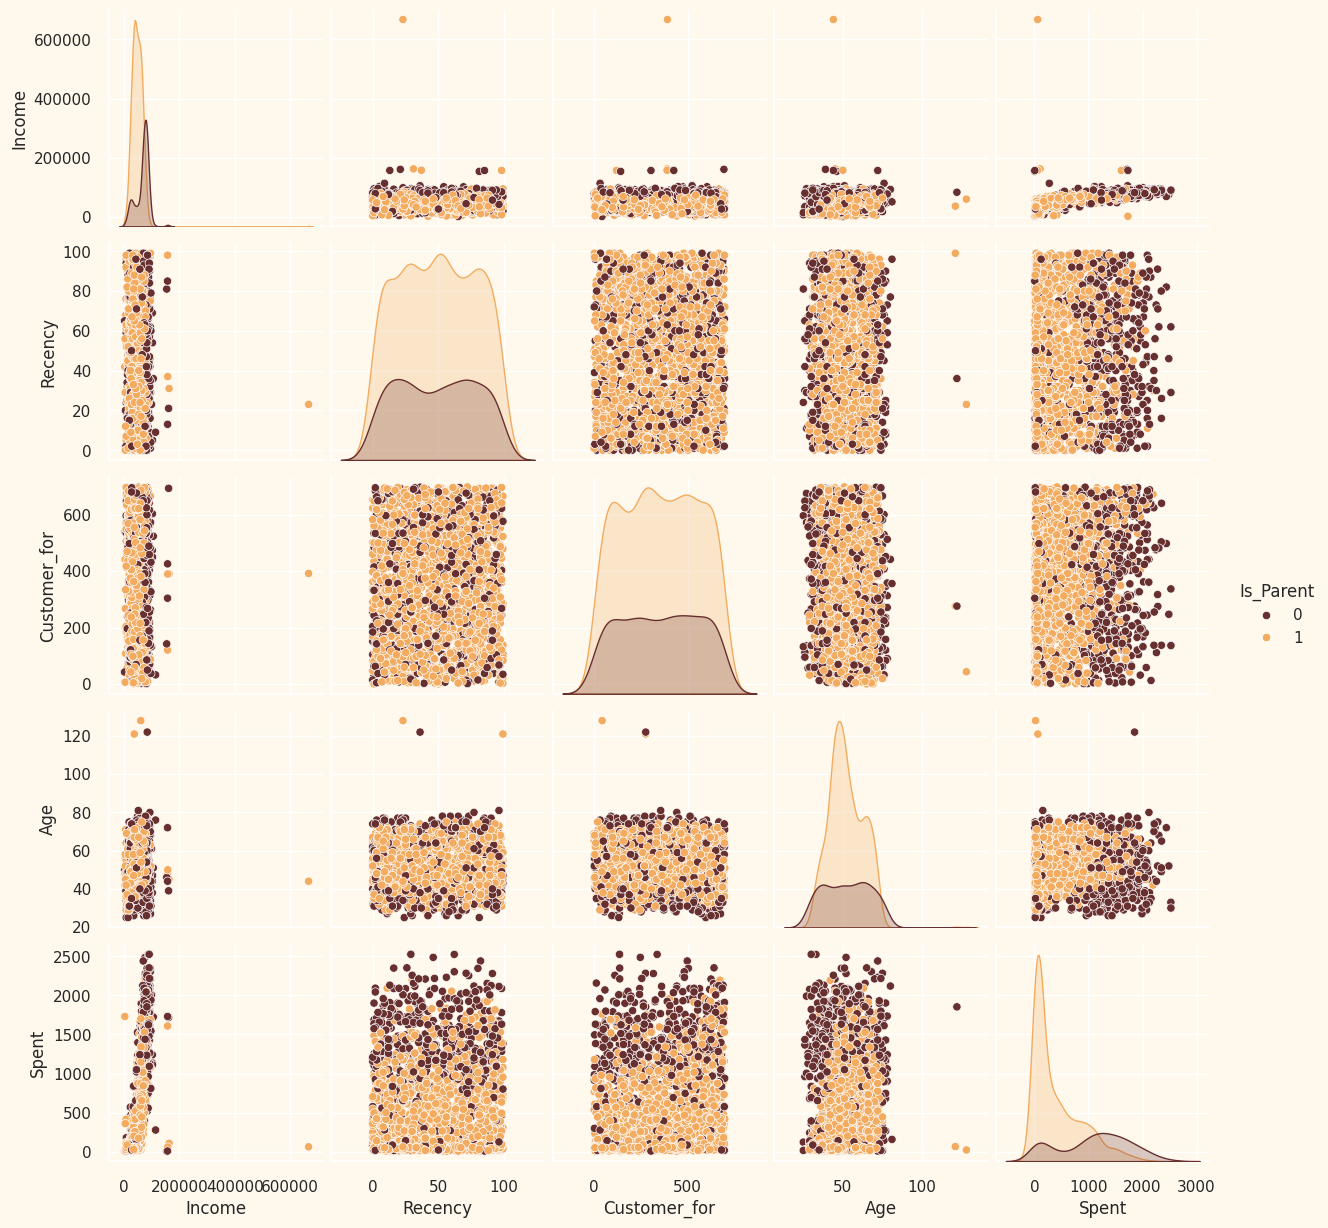

In [36]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_for", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

In [37]:
# Menghapus outliers
data = data[data['Age'] < 90]
data = data[data['Income'] < 600000]

print("Total number after droping outliers: ",len(data))

Total number after droping outliers:  2212


In [38]:
# melihat kolom bertipe objek
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Education', 'Living_With']


In [39]:
# Menghapus kolom yang tidak diperlukan
ds = data.copy()

cols_del = ['AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Response']
ds.drop(cols_del, axis=1)


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161,40,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,381,54,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,19,75,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,155,40,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,156,65,843,Partner,1,3,1


Mengubah Kolom yang kategorikal menjadi binary (encoder)

In [40]:
LE = LabelEncoder()
for i in object_cols:
  ds[i] = data[[i]].apply(LE.fit_transform)

ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,64,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,67,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,56,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,37,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,40,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,381,54,1341,1,1,3,1
2236,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,19,75,444,1,3,5,1
2237,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,155,40,1241,0,0,1,0
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,156,65,843,1,1,3,1


### Melakukan Standar Scaler yang dimana menskalakan penyabaran setiap data dengan membuat standard deviasinya yaitu 1

In [41]:
# Scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,2.375425,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.134778,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-0.282048,-0.282981,-0.280175,3.818045,-0.117256,-0.09552,-0.420977,-1.653326,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.282048,3.533809,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-0.981552,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-0.976612,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


In [42]:
scaled_ds.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03
mean,1.445498e-17,-1.252765e-16,4.175884e-17,9.636656e-17,4.015273e-18,4.898633e-17,1.043971e-17,3.212219e-18,-1.204582e-17,3.212219e-18,9.636656e-18,-1.140338e-16,-1.573987e-16,-8.672990e-17,-7.107033e-17,1.092154e-16,-5.139550e-17,4.015273e-18,1.525804e-17,7.227492e-18,3.051608e-17,-9.636656e-18,4.657717e-17,-4.497106e-17,6.183521e-17,5.942604e-17,-2.730386e-17,2.248553e-17,2.505530e-16,1.606109e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-8.935862e-01,-2.333791e+00,-8.227535e-01,-9.296987e-01,-1.694030e+00,-9.052351e-01,-6.626279e-01,-7.449911e-01,-6.875269e-01,-6.583604e-01,-8.497071e-01,-1.208163e+00,-1.491175e+00,-9.130004e-01,-1.786506e+00,-2.194360e+00,-2.820479e-01,-2.829808e-01,-2.801755e-01,-2.619142e-01,-1.172555e-01,-9.552009e-02,-4.209773e-01,-1.747176e+00,-2.315280e+00,-9.998189e-01,-1.349603e+00,-1.264598e+00,-1.758359e+00,-1.581139e+00
25%,-8.935862e-01,-7.771113e-01,-8.227535e-01,-9.296987e-01,-8.646302e-01,-8.340705e-01,-6.122946e-01,-6.736275e-01,-6.327421e-01,-6.340186e-01,-6.756101e-01,-6.884322e-01,-7.616650e-01,-9.130004e-01,-8.634873e-01,-9.572709e-01,-2.820479e-01,-2.829808e-01,-2.801755e-01,-2.619142e-01,-1.172555e-01,-9.552009e-02,-4.209773e-01,-8.580640e-01,-6.912026e-01,-8.935732e-01,-1.349603e+00,-1.264598e+00,-6.546443e-01,-1.581139e+00
50%,-8.935862e-01,-2.731156e-02,-8.227535e-01,-9.296987e-01,-6.717941e-04,-3.848445e-01,-4.612945e-01,-4.416956e-01,-4.683875e-01,-4.636265e-01,-3.757762e-01,-1.687011e-01,-3.215516e-02,-2.296788e-01,-2.481413e-01,2.798177e-01,-2.820479e-01,-2.829808e-01,-2.801755e-01,-2.619142e-01,-1.172555e-01,-9.552009e-02,-4.209773e-01,1.129032e-02,-9.285849e-02,-3.490638e-01,7.409586e-01,6.998729e-02,4.490700e-01,6.324555e-01
75%,5.716567e-01,7.679525e-01,1.040021e+00,9.080971e-01,8.632866e-01,5.921851e-01,1.678727e-01,2.908968e-01,2.255541e-01,1.449170e-01,2.335637e-01,3.510299e-01,6.973547e-01,4.536427e-01,6.748776e-01,6.921805e-01,-2.820479e-01,-2.829808e-01,-2.801755e-01,-2.619142e-01,-1.172555e-01,-9.552009e-02,-4.209773e-01,8.658261e-01,8.473966e-01,7.316544e-01,7.409586e-01,6.998729e-02,4.490700e-01,6.324555e-01
max,2.036900e+00,5.131311e+00,2.902796e+00,2.745893e+00,1.727245e+00,3.521791e+00,4.345543e+00,6.948902e+00,4.042233e+00,5.719175e+00,5.359756e+00,6.587802e+00,8.357208e+00,8.653501e+00,2.213242e+00,6.052898e+00,3.545497e+00,3.533809e+00,3.569192e+00,3.818045e+00,8.528384e+00,1.046900e+01,2.375425e+00,1.705543e+00,2.471473e+00,3.183607e+00,7.409586e-01,2.739158e+00,2.656499e+00,6.324555e-01


### Melakukan fitur agregasi dengan metode PCA

In [45]:
pca =PCA( n_components= 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=['col1', 'col2', 'col3'])
PCA_ds

,col1,col2,col3
0,4.933287,-0.268832,0.297587
1,-2.935434,0.018539,-0.458390
2,2.367150,-0.741640,-1.206677
3,-2.716321,-1.461181,-0.055423
4,-0.795007,0.152312,-0.740015
...,...,...,...
2207,2.087438,2.372733,-1.142401
2208,-2.547115,3.964730,1.062606
2209,2.726947,-1.451064,0.811091
2210,1.273296,1.624834,-1.443297


In [46]:
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,4.497106e-17,2.960584,-5.924203,-2.556960,-0.861996,2.264130,8.537423
col2,2212.0,-3.212219e-17,1.717094,-4.159721,-1.348514,-0.159643,1.248451,6.063281
col3,2212.0,0.000000e+00,1.389410,-3.187281,-0.785437,-0.164566,0.411754,8.246061


Visulasisasi dalam bentuk 3D

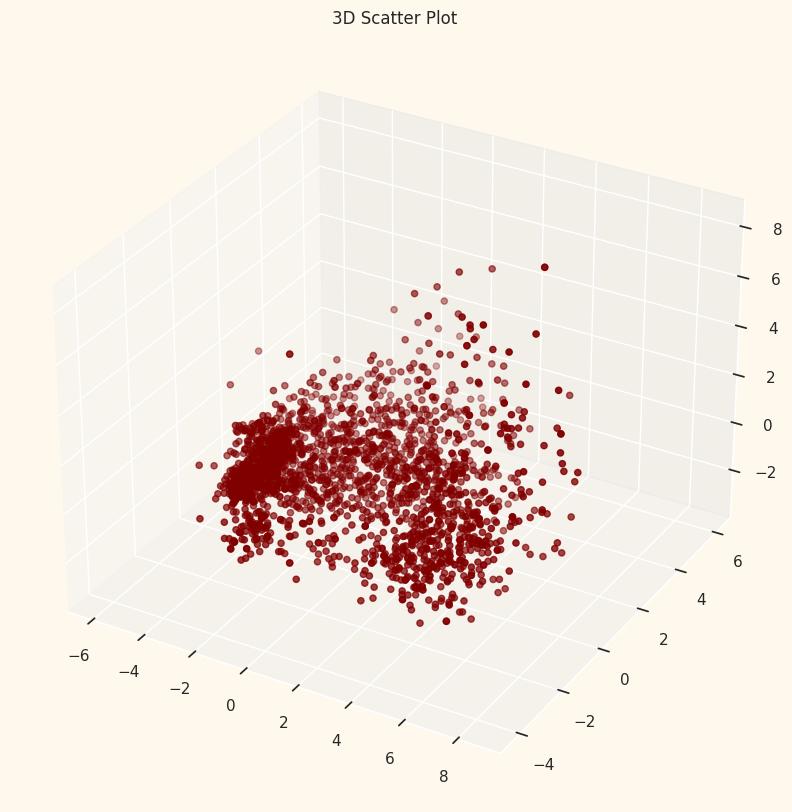

In [47]:
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='maroon', marker='o')
ax.set_title('3D Scatter Plot')
plt.show()

## Modelling / CLusterring

### Mencari jumlah kluster yang tepat dengan metode elbow

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10, random_state=1))>

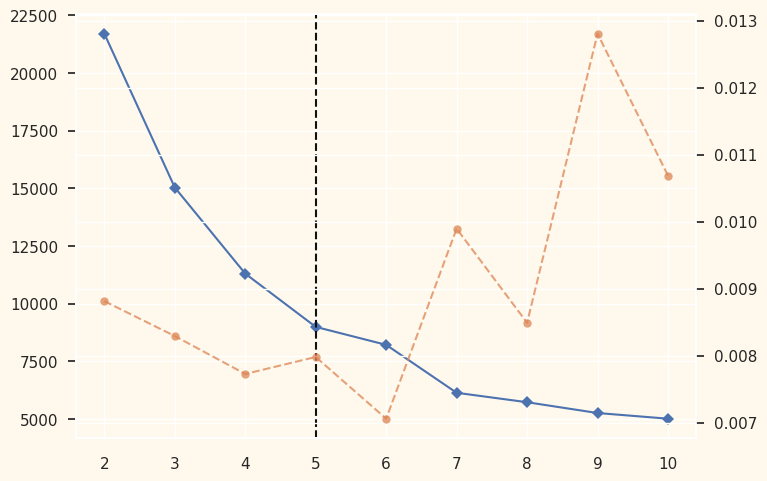

In [61]:
model = KMeans(random_state=1)
Elbow_M = KElbowVisualizer(model, k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show

### Clustering dengan metode  Agglomerative Clustering

In [65]:
AC = AgglomerativeClustering(n_clusters=5)

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds['cluster'] = yhat_AC

data['cluster'] = yhat_AC

In [67]:
PCA_ds

,col1,col2,col3,cluster
0,4.933287,-0.268832,0.297587,2
1,-2.935434,0.018539,-0.458390,3
2,2.367150,-0.741640,-1.206677,2
3,-2.716321,-1.461181,-0.055423,1
4,-0.795007,0.152312,-0.740015,0
...,...,...,...,...
2207,2.087438,2.372733,-1.142401,0
2208,-2.547115,3.964730,1.062606,0
2209,2.726947,-1.451064,0.811091,2
2210,1.273296,1.624834,-1.443297,0


visualisasi clustering

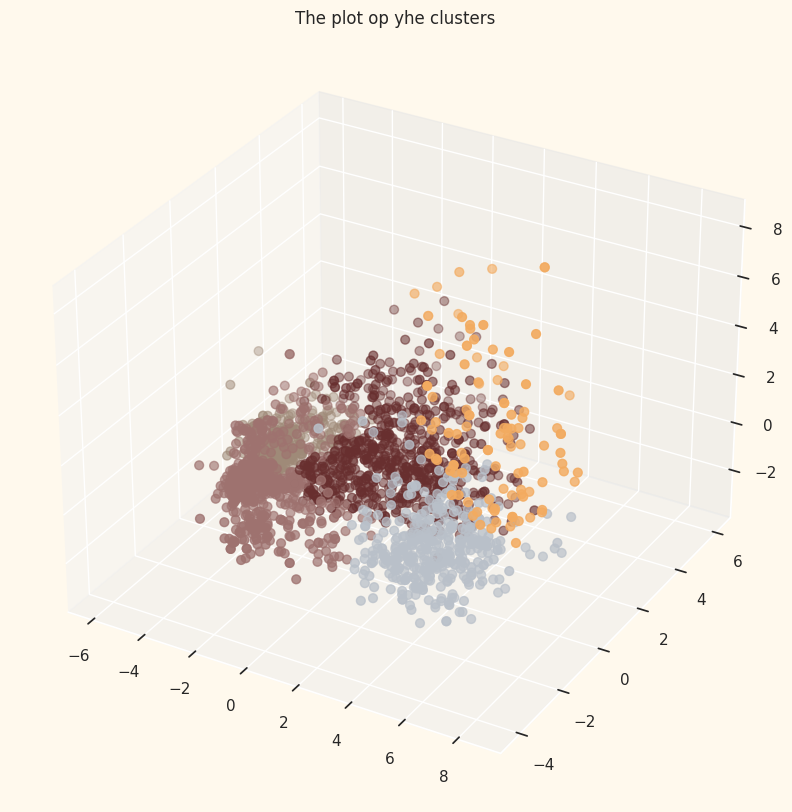

In [73]:
# plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds['cluster'], marker='o', cmap = cmap)
ax.set_title('The plot op yhe clusters')
plt.show()

<ipython-input-74-78fff1d45a74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["cluster"], palette= pal)
<ipython-input-74-78fff1d45a74>:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=data["cluster"], palette= pal)


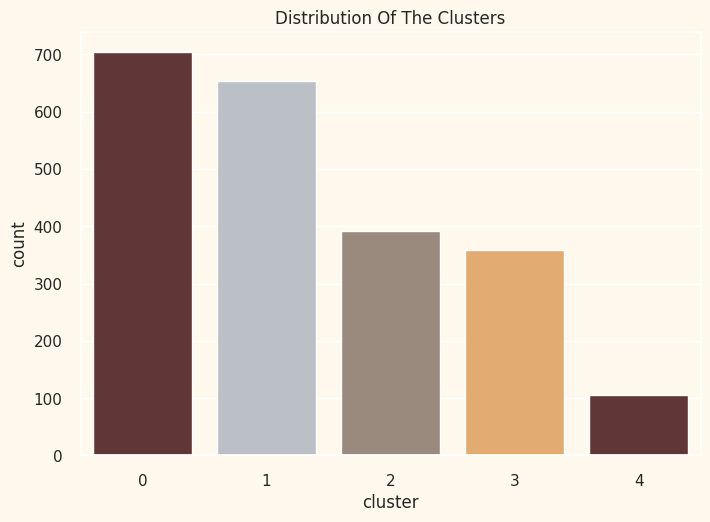

In [74]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-71-225d9a7c8282>:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["cluster"], palette= pal)


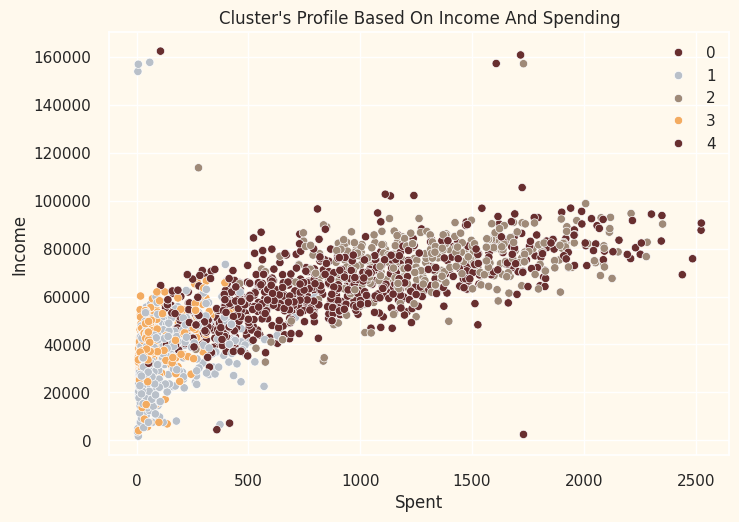

In [71]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## Evaluasi model

In [75]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg = silhouette_score(PCA_ds[['col1', 'col2', 'col3']], data['cluster'])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.3082186164637815
